In [ ]:
import h5py
import numpy as np
f = h5py.File('/mountdir/test_no_pile_5000000.h5', 'r')
list(f.keys())

features = f['features']
targets = f['targets']

print(features[0])
print(targets[0])

print(features[0].shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(50):
    if (targets[i] >= 0.5):
        plt.matshow(features[i][0])
        print(targets[i])

plt.show()


In [ ]:
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file([[1,2,3]], [[4]], f = "output.txt")

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
print "AAA" 
print digits.images.shape
    
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print "BBB"
print data.shape[0]

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()


In [35]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model

model = VGG16()
print(model.summary())

plot_model(model, to_file='vgg.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

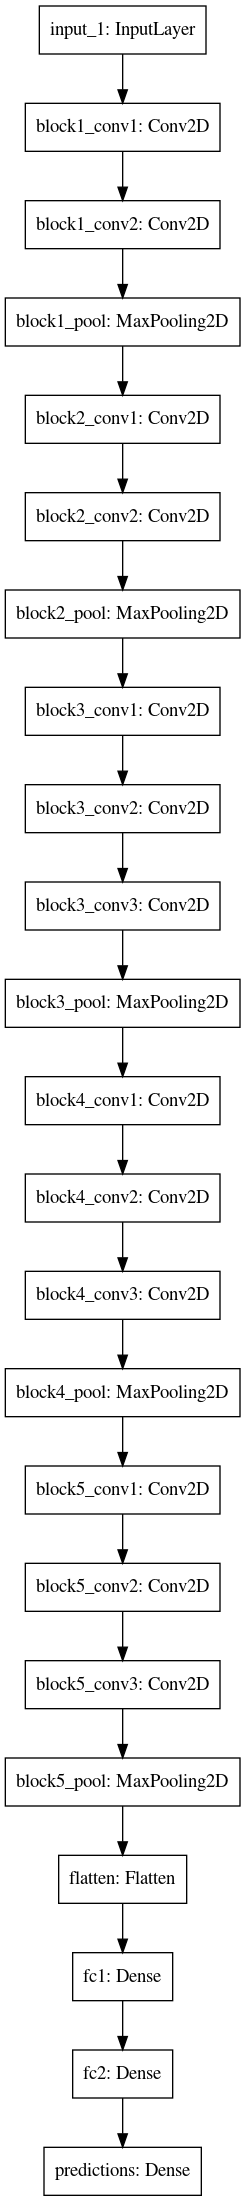

In [2]:
from IPython.display import Image
Image(filename='vgg.png') 


In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# load an image from file

image = load_img('vgg.png', target_size=(224, 224))

image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

yhat = model.predict(image)
print(yhat)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


In [ ]:
import random
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
import numpy as np

# read data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# limit the amount of the data
# train data
ind_train = random.sample(list(range(x_train.shape[0])), 1000)
x_train = x_train[ind_train]
y_train = y_train[ind_train]

# test data
ind_test = random.sample(list(range(x_test.shape[0])), 1000)
x_test = x_test[ind_test]
y_test = y_test[ind_test]

def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 320, 320, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(320, 320), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

# resize train and  test data
x_train_resized = resize_data(x_train)
x_test_resized = resize_data(x_test)

print(x_train_resized.shape)


In [ ]:
print("ssssss")

NUM_TRAIN = 1000
NUM_TEST =  500

import random
import cv2
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import SGD
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
import numpy as np

import h5py
import numpy as np
f = h5py.File('/mountdir/test_no_pile_5000000.h5', 'r')
list(f.keys())

features = f['features']
targets = f['targets']


# VGG needs 3 channels (R, G, B) and doesn't support grayscale image as the input
x_train = np.stack( (f['features'][:NUM_TRAIN].reshape((NUM_TRAIN, 32, 32)),)*3, axis = -1)                
x_test = np.stack( (f['features'][NUM_TRAIN+1:NUM_TRAIN+1+NUM_TEST].reshape((NUM_TEST, 32, 32)),)*3, axis = -1)

y_train = f['targets'][:NUM_TRAIN]
y_train = to_categorical(y_train)

y_test = f['targets'][NUM_TRAIN+1:NUM_TRAIN+1+NUM_TEST]
y_test = to_categorical(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


def model(x_train, y_train, base_model):
    print(x_train.shape)
    print(y_train.shape)

    # get layers and add average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # add fully-connected layer
    x = Dense(512, activation='relu')(x)

    # add output layer
    predictions = Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # freeze pre-trained model area's layer
    for layer in base_model.layers:
        layer.trainable = False

    # update the weight that are added
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
    print("cccccccccc")
    print(x_train.shape)
    print(y_train.shape)
    model.fit(x_train, y_train)

    # choose the layers which are updated by training
    layer_num = len(model.layers)
    for layer in model.layers[:int(layer_num * 0.9)]:
        layer.trainable = False

    for layer in model.layers[int(layer_num * 0.9):]:
        layer.trainable = True

    # update the weights
    model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5)

    return history

vgg_16_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
res_50_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
vgg_19_model = VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

history_res_50 = model(x_train, y_train, res_50_model)
history_vgg_19 = model(x_train, y_train, vgg_19_model)
history_vgg_16 = model(x_train, y_train, vgg_16_model)


# check accuracy
evaluation_res_50 = history_res_50.model.evaluate(x_test,y_test)
evaluation_vgg_19 = history_vgg_19.model.evaluate(x_test,y_test)
evaluation_vgg_16 = history_vgg_16.model.evaluate(x_test,y_test)


print("res_50:{}".format(evaluation_res_50))
print("vgg_19:{}".format(evaluation_vgg_19))
print("vgg_16:{}".format(evaluation_vgg_16))

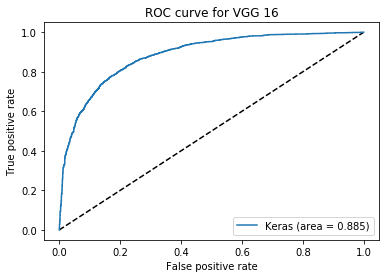

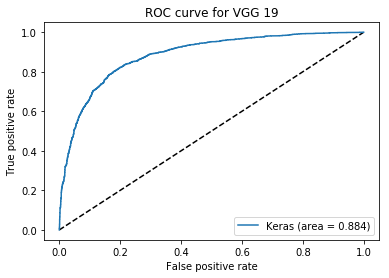

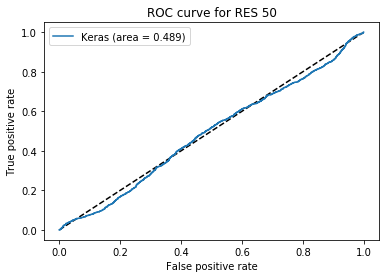

In [8]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_ROC(history, name):
    y_pred_keras = history.model.predict(x_test).ravel()
    y_test_reshape = y_test.reshape(2*NUM_TEST)
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_reshape, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for %s' % name)
    plt.legend(loc='best')
    plt.show()
    
plot_ROC(history_vgg_16, 'VGG 16')
plot_ROC(history_vgg_19, 'VGG 19')
plot_ROC(history_res_50, 'RES 50')

In [ ]:
from keras.engine.topology import Layer, InputSpec

class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight((self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

from keras.models import Sequential
new_model =Sequential()

from keras.applications.vgg16 import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
layer_num = len(base_model.layers)
for layer in base_model.layers:
    layer.trainable = False
    new_model.add(layer)

from keras import backend as K
from keras.layers import Dense, GlobalAveragePooling2D
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(2, activation='relu'))
new_model.add(ClusteringLayer(n_clusters=2, name='clustering'))

print("xxxx")

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, n_init=20)
y_pred = kmeans.fit_predict(new_model.predict(x_train))
new_model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])



def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

new_model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

x = x_train

loss = 0
index = 0
maxiter = 10000
update_interval = 140
index_array = np.arange(x.shape[0])
pretrain_epochs = 100
batch_size = 256

index_array = np.arange(x_train.shape[0])
print("aaa")
for ite in range(int(maxiter)):
    print(ite)
    if ite % update_interval == 0:
        q = new_model.predict(x_train, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p
        # evaluate the clustering performance
        y_pred = q.argmax(1)
        #if y is not None:
        #    acc = np.round(metrics.acc(y, y_pred), 5)

    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = new_model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_ROC(model, name):
    y_pred_keras = model.predict(x_test).ravel()
    y_test_reshape = y_test.reshape(2*NUM_TEST)
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_reshape, y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve for %s' % name)
    plt.legend(loc='best')
    plt.show()
    
plot_ROC(new_model, 'Unsupervised Learning')
